<a href="https://colab.research.google.com/github/sachinwandale1994/Capstone-project/blob/main/EDA_on_Play_Store_app_Review_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Play Store App Review Analysis**

<img src="https://drive.google.com/uc?id=1kj5p5-n7GLkgkJe-if6Sd_Z4MFZf2uPT" alt="drawing" width="400"/>


##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Team Member 1 -** Sachin Wandale

# **Project Summary -**


The objective of this project is to perform Exploratory Data Analysis (EDA) on Play Store app reviews to gain insights into user opinions, sentiments, and preferences.
By analyzing a vast dataset of app reviews, we aim to uncover patterns, trends, and actionable information that can be useful for app developers, marketers, and decision-makers.

The project will involve the following steps:

1. Data Collection: Gathering a substantial volume of Play Store app reviews, including text reviews, ratings, app metadata,
   and other relevant information.

2. Data Cleaning and Preprocessing: Performing necessary data cleaning and preprocessing tasks to ensure the data is in a suitable format for analysis.
   This may involve removing duplicates, handling missing values, standardizing text, and converting ratings into a consistent numerical scale.

3. Exploratory Data Analysis: Conducting a comprehensive exploratory analysis to understand the characteristics of the dataset.
   This includes analyzing distributions, correlations, and statistical measures of the review ratings, app categories, review lengths and other relevant factors.

4. Visualizations and Insights: Presenting the findings of the EDA through meaningful visualizations such as histograms, bar plots, etc.
   These visual representations will help identify popular app categories, frequently mentioned features, and any other noteworthy patterns.

By conducting this EDA on Play Store app reviews, this project aims to provide valuable insights that can drive decision-making processes and
support the development of user-centric apps. The analysis will enable stakeholders to make informed decisions regarding app enhancements, feature prioritization,
marketing strategies, and overall app performance improvements.


Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

https://github.com/sachinwandale1994/Capstone-project/blob/main/EDA_on_Play_Store_app_Review_Analysis.ipynb

# **Problem Statement**


**Write Problem Statement Here.**

Question 1
What is the relationship between application rating and installation?

Question 2
What is the rating of an an application with given number of reviews and installation ?
1. How can we identify the most common issues reported by users in Play Store app reviews?
2. What are the key factors that influence user ratings and reviews of apps on the Play Store?
3. Is there a correlation between the length of app reviews and the overall rating given by users on the Play Store?
4. Are there any specific keywords or phrases in app reviews that indicate user satisfaction or dissatisfaction?
5. How can we detect and analyze spam or fake reviews in the Play Store app review dataset?
6. What are the main reasons behind users uninstalling apps, as indicated by their reviews on the Play Store?
7. Can we identify patterns or trends in app reviews based on factors such as app category, release date, or developer reputation?
8. How do app ratings and reviews vary across different versions of the same app on the Play Store?
9. Are there any specific features or functionalities that consistently receive positive or negative feedback from users in Play Store app reviews?
10. Can sentiment analysis techniques be used to classify app reviews into positive, negative, or neutral categories, and how accurate are these classifications?
11. Are there any differences in user ratings and reviews based on the geographic location of the users, as indicated by their Play Store profiles?
12. How do the sentiments expressed in app reviews change over time, and can we identify any external events or app updates that correlate with significant changes in sentiment?


#### **Define Your Business Objective?**

Answer Here.

To analyze the Google Play Store Apps by implementing Data Science Process

To determine trends and patterns in Google Play Store Apps

# **General Guidelines** : -

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.

     The additional credits will have advantages over other students during Star Student selection.

             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.


```
# Chart visualization code
```


*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')   # Google drive mounting

Mounted at /content/drive


In [3]:
# load first Dataset
df_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Python for Data Science /Capstone Project/Python/Play Store app Review/Play Store Data.csv')

In [4]:
# load Second Dataset
df_user_review = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Python for Data Science /Capstone Project/Python/Play Store app Review/User Reviews.csv')

### Dataset First View

In [5]:
# Dataset First Look
df_data.head() # head() function given default 5 first rows in output of df_data dataframe

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [6]:
df_user_review.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


### Dataset Rows & Columns count

In [7]:
# Dataset Rows & Columns count
rows1 = df_data.shape[0]
cols1 = df_data.shape[1]

# Printing the number of Dataset rows and columns
print("Rows in df_data dataset: ", rows1)
print("Columns in df_data dataset: ", cols1)

# Similarly for another Dataset

# Dataset Rows & Columns count
rows2 = df_user_review.shape[0]
cols2 = df_user_review.shape[1]

# Printing the number of Dataset rows and columns
print("Rows in df_user_review dataset: ", rows2)
print("Columns in df_user_review dataset: ", cols2)

Rows in df_data dataset:  10841
Columns in df_data dataset:  13
Rows in df_user_review dataset:  64295
Columns in df_user_review dataset:  5


In [8]:
print(df_data.shape)        # shape() method is used to fetch the dimensions of Pandas and NumPy type objects in python.
print(df_user_review.shape)

(10841, 13)
(64295, 5)


### Dataset Information

In [9]:
# Dataset Info
df_data.info() #This method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [10]:
df_user_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


#### Duplicate Values

In [11]:
# Dataset Duplicate Value Count
print("Shape of df_data DataFreame:",df_data.shape)    # dataset shape before removing duplicate values.
print("Shape of df_user_review DataFreame:",df_user_review.shape)

Shape of df_data DataFreame: (10841, 13)
Shape of df_user_review DataFreame: (64295, 5)


In [12]:
print("Duplicate entry in df_data data:",len(df_data[df_data.duplicated()]))  #By using duplicated method count total number of duplicates in dataset
print("Duplicate entry in df_user_review data:",len(df_user_review[df_user_review.duplicated()]))

Duplicate entry in df_data data: 483
Duplicate entry in df_user_review data: 33616


In [13]:
duplicate_df = df_data[df_data.duplicated(keep = 'last') ] # all duplicates values from dt_data dataset
duplicate_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
164,Ebook Reader,BOOKS_AND_REFERENCE,4.1,85842,37M,"5,000,000+",Free,0,Everyone,Books & Reference,"June 25, 2018",5.0.6,4.0 and up
192,Docs To Go™ Free Office Suite,BUSINESS,4.1,217730,Varies with device,"50,000,000+",Free,0,Everyone,Business,"April 2, 2018",Varies with device,Varies with device
193,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
204,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
213,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3787,ABC News - US & World News,NEWS_AND_MAGAZINES,4.0,18976,35M,"1,000,000+",Free,0,Everyone 10+,News & Magazines,"June 6, 2018",3.19.11,5.0 and up
3788,NBC News,NEWS_AND_MAGAZINES,4.1,63020,Varies with device,"5,000,000+",Free,0,Everyone 10+,News & Magazines,"February 13, 2018",Varies with device,Varies with device
3790,USA TODAY,NEWS_AND_MAGAZINES,4.1,49259,Varies with device,"5,000,000+",Free,0,Everyone 10+,News & Magazines,"August 2, 2018",Varies with device,Varies with device
3792,CNN Breaking US & World News,NEWS_AND_MAGAZINES,4.0,293080,25M,"10,000,000+",Free,0,Everyone 10+,News & Magazines,"August 6, 2018",5.17,4.4 and up


In [14]:
duplicate_df2 = df_user_review[df_user_review.duplicated(keep = 'last') ] # all duplicates values from df_user_review dataset
duplicate_df2

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
...,...,...,...,...,...
64289,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [15]:
#Remove Duplicates from Main Database
main_data_1 = df_data.drop_duplicates() #remove duplicate and save as new main_data_1
main_data_1.shape #shape after removing duplicates

(10358, 13)

In [16]:
#Remove Duplicates from Main Database
user_reviews_df1 = df_user_review.drop_duplicates() #remove duplicate and save as new DataFrame user_reviews_df1
user_reviews_df1.shape #shape after removing duplicates

(30679, 5)

#### Missing Values/Null Values

In [17]:
# Missing Values/Null Values Count
main_data_1.isnull().sum().sum()
# Total number of missing values in main_data_1 is 1478

1478

In [18]:
user_reviews_df1.isnull().sum().sum()
# Total number of missing values in user_reviews_df1 is 3933

3933

In [19]:
# Visualizing the missing values
# define inpute_median function to fill the null values by using aggragate function like mean,mode,median.
def inpute_median(series):
  return series.fillna(series.median())



In [20]:
main_data_1['Rating'].unique() # check null values in Rating column


array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        nan,  4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,
        3. ,  1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,
        1.8,  2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

In [21]:
main_data_1.Rating = main_data_1['Rating'].transform(inpute_median)

In [22]:
main_data_1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       8
Android Ver       3
dtype: int64

In [23]:
# mode of catagarical data
print(main_data_1['Type'].mode())
print(main_data_1['Current Ver'].mode())
print(main_data_1['Android Ver'].mode())

0    Free
Name: Type, dtype: object
0    Varies with device
Name: Current Ver, dtype: object
0    4.1 and up
Name: Android Ver, dtype: object


In [24]:
# fill the missing catagarical values with mode
main_data_1['Type'].fillna(str(main_data_1['Type'].mode().values[0]), inplace = True)
main_data_1['Current Ver'].fillna(str(main_data_1['Current Ver'].mode().values[0]), inplace = True)
main_data_1['Android Ver'].fillna(str(main_data_1['Android Ver'].mode().values[0]), inplace = True)

In [25]:
main_data_1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [52]:
main_data_1.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

### What did you know about your dataset?

Answer Here
The dataset given is a dataset from Telecommunication industry, and we have to analysis the churn of customers and the insights behind it.

Churn prediction is analytical studies on the possibility of a customer abandoning a product or service. The goal is to understand and take steps to change it before the costumer gives up the product or service.

The above dataset has 3333 rows and 20 columns. There are no mising values and duplicate values in the dataset.

## ***2. Understanding Your Variables***

In [26]:
# Dataset Columns
list(main_data_1.columns)

['App',
 'Category',
 'Rating',
 'Reviews',
 'Size',
 'Installs',
 'Type',
 'Price',
 'Content Rating',
 'Genres',
 'Last Updated',
 'Current Ver',
 'Android Ver']

In [27]:
# Dataset Describe
main_data_1.describe(include='all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10358,10358,10358.000000,10358,10358,10358,10358,10358,10357,10358,10358,10358,10358
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1943,NaN,593,1526,1488,9592,9592,8382,842,298,1310,2382
mean,NaN,NaN,4.205165,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.506868,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
df_user_review.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


In [54]:
user_reviews_df1.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

### Variables Description

Answer Here


**App**: This column contains the names of the applications listed in the Play Store.

**Category**: This column specifies the category or genre to which the app belongs. Examples of categories include games, social, productivity, etc.

**Rating**: This column represents the average user rating given to the app. Ratings are usually on a scale of 1 to 5, with higher values indicating better user satisfaction.

**Reviews**: This column indicates the number of user reviews/ratings the app has received. It represents the feedback and engagement of users with the app.

**Size**: This column provides information about the size of the app in terms of storage space it occupies on a device, typically measured in megabytes (MB) or kilobytes (KB).

**Installs**: This column represents the approximate number of times the app has been installed or downloaded from the Play Store. It indicates the popularity and user adoption of the app.

**Type**: This column specifies whether the app is free or paid. It distinguishes between free apps and those that require a purchase or subscription.

**Price**: This column indicates the cost of the app if it is not free. It represents the price users need to pay to download or access the app.

**Content Rating**: This column indicates the recommended age group or audience for which the app is suitable. Examples include "Everyone," "Teen," "Mature," etc.

**Genres**: This column provides additional information about the app's genre or category, which can be more specific than the "Category" column. For example, within the "Games" category, genres could include puzzle, action, adventure, etc.

**Last Updated**: This column represents the date when the app was last updated in the Play Store. It indicates the freshness and maintenance of the app.

**Current Ver**: This column specifies the current version number of the app available in the Play Store. It helps users and developers track the software updates and improvements.

**Android Ver**: This column indicates the minimum Android version required to run the app. It ensures compatibility between the app and the user's device.

**Details of Each Columns of user_reviews_df1 DataFrame**

**App**: This column likely contains the names or titles of different apps available on the Play Store. Each row corresponds to a specific app.

**Translated_Review**: This column likely contains user reviews or feedback about the corresponding app in English Langauge.

**Sentiment**:	Sentiment of the review, which can be positive, neutral, or negative.

**Sentiment_Polarity**:	Sentiment in numerical form, ranging from -1.00 to 1.00.

**Sentiment_Subjectivity**:This column likely represents the subjectivity of the reviews. Measure of the expression of opinions, evaluations, feelings, and speculations

### Check Unique Values for each variable.

In [29]:
for i in main_data_1.columns.tolist():
  print("No. of unique values in ",i,"is",main_data_1[i].nunique(),".")

No. of unique values in  App is 9660 .
No. of unique values in  Category is 34 .
No. of unique values in  Rating is 40 .
No. of unique values in  Reviews is 6002 .
No. of unique values in  Size is 462 .
No. of unique values in  Installs is 22 .
No. of unique values in  Type is 3 .
No. of unique values in  Price is 93 .
No. of unique values in  Content Rating is 6 .
No. of unique values in  Genres is 120 .
No. of unique values in  Last Updated is 1378 .
No. of unique values in  Current Ver is 2832 .
No. of unique values in  Android Ver is 33 .


In [50]:
main_data_1

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000.0,10000.0,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000.0,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000.0,50000000.0,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38.0,53000.0,5000.0,Free,0.0,Everyone,Education,2017-07-25,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,3.6,100.0,Free,0.0,Everyone,Education,2018-07-06,1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,4.3,3.0,9.5,1000.0,Free,0.0,Everyone,Medical,2017-01-20,1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114.0,NaN,1000.0,Free,0.0,Mature 17+,Books & Reference,2015-01-19,Varies with device,Varies with device


## 3. ***Data Wrangling***

### Data Wrangling Code

In [30]:
# Check Unique Values for each variable.
# Category
main_data_1['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [31]:
# '1.9' is wrong value. So I have to see in which rows '1.9' corresponds to.
main_data_1[main_data_1['Category'] == '1.9']


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,4.1 and up


In [32]:
# We can make NaN category value. At that time we can get a clean data. I used shift() method that is found Pandas library.

main_data_1.loc[10472] = main_data_1.loc[10472].shift()
main_data_1['App'].loc[10472] = main_data_1['Category'].loc[10472]
main_data_1['Category'].loc[10472] = np.nan
main_data_1.loc[10472]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              NaN
Rating                                                1.9
Reviews                                              19.0
Size                                                 3.0M
Installs                                           1,000+
Type                                                 Free
Price                                                   0
Content Rating                                   Everyone
Genres                                                NaN
Last Updated                            February 11, 2018
Current Ver                                        1.0.19
Android Ver                                    4.0 and up
Name: 10472, dtype: object

In [33]:
# Rating
main_data_1['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4.0, 4.8, 4.9,
       3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5.0, 2.6, 3.0, 1.9, 2.5, 2.8, 2.7,
       1.0, 2.9, 2.3, 2.2, 1.7, 2.0, 1.8, 2.4, 1.6, 2.1, 1.4, 1.5, 1.2,
       '1.9'], dtype=object)

In [34]:
#Data type of Rating is object. If we convert from string to numeric, we can make easy.

main_data_1['Rating'] = pd.to_numeric(main_data_1['Rating'], errors='coerce')
main_data_1['Rating'].dtype

dtype('float64')

In [35]:
# Review
main_data_1['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [36]:
main_data_1['Reviews'] = main_data_1.Reviews.replace("0.0",0)
main_data_1['Reviews'] = main_data_1.Reviews.replace("3.0M",3000000.0)
main_data_1['Reviews'] = main_data_1['Reviews'].astype(float)
main_data_1['Reviews'].dtype

dtype('float64')

In [37]:
# Size
main_data_1['Size'].unique()


array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [38]:
# Data type of Size is object. I had to convert the column because it contains the application sizes. Firstly I changed 'Varies with device' value with Nan.
# After, I dropped 'M' and 'k'. I changed from '1000+' to 1000. Finally, I converted float value.
main_data_1['Size'] = main_data_1.Size.replace("Varies with device",np.nan)
main_data_1['Size'] = main_data_1.Size.str.replace("M","000") # All size values became the kilobyte type.
main_data_1['Size'] = main_data_1.Size.str.replace("k","")
main_data_1['Size'] = main_data_1.Size.replace("1,000+",1000)
main_data_1['Size'] =main_data_1['Size'].astype(float)
main_data_1['Size'].dtype

dtype('float64')

In [39]:
#Installs
main_data_1['Installs'].unique()


array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [40]:
# Data type of Size is object. I'm gonna make similar processes, which I made the in 'Size'.

main_data_1['Installs'] = main_data_1.Installs.str.replace(",","")
main_data_1['Installs'] = main_data_1.Installs.str.replace("+","")
main_data_1['Installs'] = main_data_1.Installs.replace("Free",np.nan)
main_data_1['Installs'] = main_data_1['Installs'].astype(float)
main_data_1['Installs'].dtype

dtype('float64')

In [41]:
# Price
main_data_1['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [42]:
# Data type of Price is object. I have made similar processes, which I made the in 'Size'.
main_data_1['Price'] = main_data_1.Price.replace("Everyone",np.nan)
main_data_1['Price'] = main_data_1.Price.str.replace("$","").astype(float)
main_data_1['Price'].dtype

dtype('float64')

In [43]:
# Last Update
main_data_1['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

In [44]:
# Data type of Last Uptated is object. I converted from string to date type.
main_data_1['Last Updated'] = pd.to_datetime(main_data_1['Last Updated'])
main_data_1['Last Updated']

0       2018-01-07
1       2018-01-15
2       2018-08-01
3       2018-06-08
4       2018-06-20
           ...    
10836   2017-07-25
10837   2018-07-06
10838   2017-01-20
10839   2015-01-19
10840   2018-07-25
Name: Last Updated, Length: 10358, dtype: datetime64[ns]

In [45]:
# Write your code to make your dataset analysis ready.
#dropped the rows having all null values
df_user_review1 = df_user_review.dropna(subset=["Translated_Review"],how="all")
df_user_review1.isnull().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [46]:
df_user_review1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37427 entries, 0 to 64230
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     37427 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37427 non-null  object 
 3   Sentiment_Polarity      37427 non-null  float64
 4   Sentiment_Subjectivity  37427 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.7+ MB


In [47]:
df_user_review1.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37427.000000,37427.000000
mean,0.182171,0.492770
std,0.351318,0.259904
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


In [48]:
main_data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10358 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10358 non-null  object        
 1   Category        10357 non-null  object        
 2   Rating          10358 non-null  float64       
 3   Reviews         10358 non-null  float64       
 4   Size            8832 non-null   float64       
 5   Installs        10358 non-null  float64       
 6   Type            10358 non-null  object        
 7   Price           10358 non-null  float64       
 8   Content Rating  10358 non-null  object        
 9   Genres          10357 non-null  object        
 10  Last Updated    10358 non-null  datetime64[ns]
 11  Current Ver     10358 non-null  object        
 12  Android Ver     10358 non-null  object        
dtypes: datetime64[ns](1), float64(5), object(7)
memory usage: 1.4+ MB


### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

TypeError: ignored

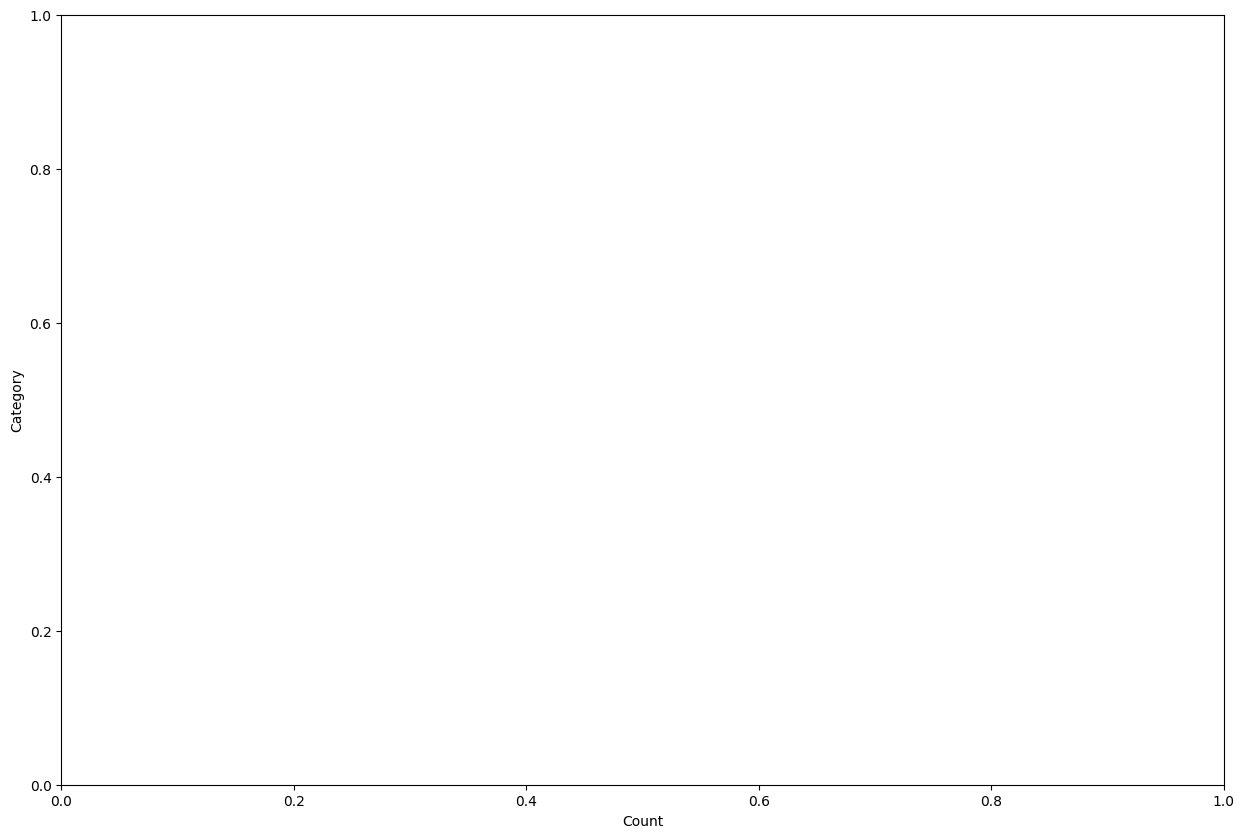

In [49]:
# Chart - 1 visualization code
#Top Categories Apps in Playstore
plt.figure(figsize=(15,10))

y = main_data_1['Category'].value_counts().index
x = main_data_1['Category'].value_counts()
plt.xlabel("Count")
plt.ylabel("Category")
graph = sns.barplot(x, y)
graph.set_title("Top categories on Playstore", fontsize = 20);

##### 1. Why did you pick the specific chart?

In [ ]:
# The box plot organizes large amounts of data, and visualizes outlier values.
# # before cleaning the dataset outlier value found from the above boxplot is at an index values of 10472.
# which Rating is 19 but for our analysis rating varies from 1 to 5.

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

In [ ]:

# from the above chart most of the app is rating is between 4 to 4.5

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

In [ ]:
# Chart - 2 visualization code
y = main_data_1['Genres'].value_counts().index
x = main_data_1['Genres'].value_counts().head(10)
xsisG = []
ysisG = []
for i in range(len(x)):
    xsisG.append(x[i])
    ysisG.append(y[i])

plt.figure(figsize=(15,5))
plt.xlabel("Count")
plt.ylabel("Geners")

graph = sns.barplot(x = xsisG, y = ysisG,)
graph.set_title("Top Genres on Playstore", fontsize = 20);

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [ ]:
# Chart - 3 visualization code Category and Reviews

category_list = list(main_data_1['Category'].unique())
category_review = []
for i in category_list:
    x = main_data_1[main_data_1['Category'] == i]
    if(len(x)!=0):
        review = sum(x.Reviews)/len(x)
        category_review.append(review)
    else:
        review = sum(x.Reviews)
        category_review.append(review)
#sorting
data_category_reviews = pd.DataFrame({'category': category_list,'review':category_review})
new_index = (data_category_reviews['review'].sort_values(ascending=False)).index.values
sorted_data =data_category_reviews.reindex(new_index)

# visualization
plt.figure(figsize=(15,10))
sns.barplot(x=sorted_data['category'], y=sorted_data['review'])
plt.xticks(rotation=80)
plt.xlabel("Category")
plt.ylabel("Reviews")
plt.title("Category and Reviews")
plt.plot()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [ ]:
# Chart - 4 visualization code Category and Installs
category_list = list(main_data_1['Category'].unique())
category_install = []
for i in category_list:
    x = main_data_1[main_data_1['Category'] == i]
    if(len(x)!=0):
        install = sum(x.Installs)/len(x)
        category_install.append(install)
    else:
        install = sum(x.Installs)
        category_install.append(install)

#sorting
data_category_install = pd.DataFrame({'category': category_list,'install':category_install})
new_index = (data_category_install['install'].sort_values(ascending=False)).index.values
sorted_data =data_category_install.reindex(new_index)

# visualization
plt.figure(figsize=(15,10))
sns.barplot(x=sorted_data['category'], y=sorted_data['install'])
plt.xticks(rotation=80)
plt.xlabel("Category")
plt.ylabel("Install")
plt.title("Category and Install")
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [ ]:
# Chart - 5 visualization code Content Rating
plt.figure(figsize=(10,7))
sns.countplot(data=main_data_1, x='Content Rating')
plt.xticks(rotation=80)
plt.title('Content Rating',color = 'blue',fontsize=15)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [ ]:
# Chart - 6 visualization code
plt.figure(figsize=(15,5))
plt.xlabel("Rating")
plt.ylabel("Frequency")
graph = sns.kdeplot(main_data_1.Rating, color="#4B0751", shade = True)
plt.title('Most Frequent Rating',size = 20);

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [ ]:
# Chart - 7 visualization code
# Paid and Free Apps Ratio From All Apps
plt.figure(figsize=(15,10))
x=main_data_1.Type.value_counts()
label=["Free","Paid"]
plt.pie(x,labels=label,autopct="%1.2f%%",shadow=True, explode=[0,.21], startangle=45)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
main_data_1.columns

In [ ]:
# Chart - 8 visualization code
# App Updatation Details By Year
plt.figure(figsize=(15,5))
plt.title("Apps updatation by years", fontsize=20)
ax = plt.hist(main_data_1.Last Updated, color="#4B0751")
plt.tick_params(left='on', bottom='on')
plt.xlabel("Year")
plt.ylabel("Number of apps updated");
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code
#marge both database for more analysis

merged_df = main_data_1.merge(df_user_review1, on="App")
merged_df.info()

In [ ]:
# Sentiment Data Across the All Reviews
plt.figure(figsize=(15,10))
pd.value_counts(df_user_review1["Sentiment"]).plot(kind = 'pie',  autopct='%1.2f%%',shadow=True, explode=[0, 0.05, 0.05], startangle=45 )
plt.title("Sentiment data across database",size=20)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code
# corr() : It returns correlation.
# describe (): It returns number of entries, average of entries, outlier values, standart deviation, minimum and maximum entry.
main_data_1.corr()

In [ ]:
#correlation map
f,ax = plt.subplots(figsize=(6, 6))
sns.heatmap(main_data_1.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***